In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


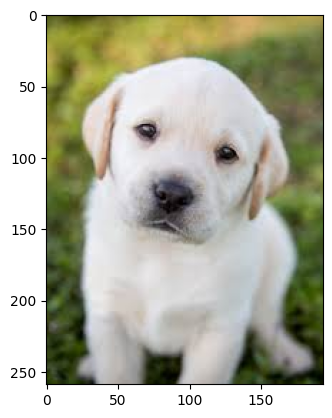

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/OpenCV/1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
height, width, channels = img.shape
print(f"Độ phân giải: {width}x{height}, Số kênh màu: {channels}")

Độ phân giải: 194x259, Số kênh màu: 3


In [ ]:
data_structure = img.shape
file_size = os.path.getsize('/content/drive/MyDrive/Colab Notebooks/OpenCV/1.jpg')
print(f"Cấu trúc dữ liệu ảnh: {data_structure}")
print(f"Dung lượng file ảnh: {file_size} bytes")

Cấu trúc dữ liệu ảnh: (259, 194, 3)
Dung lượng file ảnh: 5279 bytes


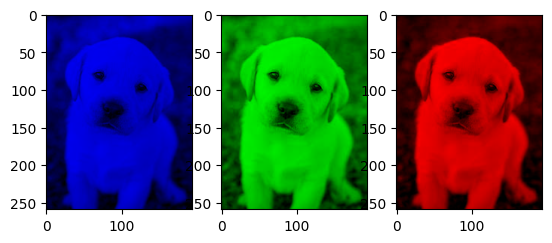

In [ ]:
b_channel = None
g_channel = None
r_channel = None

blue,green,red = cv2.split(img)
zeros = np.zeros(blue.shape, np.uint8)
b_channel = cv2.merge([blue,zeros,zeros])
g_channel = cv2.merge([zeros,green,zeros])
r_channel = cv2.merge([zeros,zeros,red])

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(b_channel, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(g_channel, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(r_channel, cv2.COLOR_BGR2RGB))
plt.show()

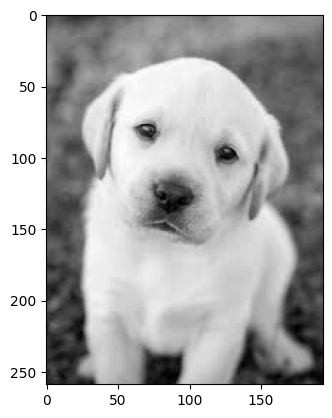

(259, 194)
(256,)


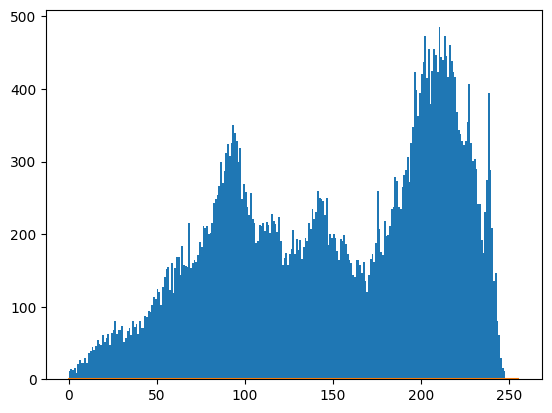

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()
print(gray.shape)
histogram = np.zeros((256, ))
print(histogram.shape)

plt.hist(gray.ravel(),256,[0,256])

plt.plot(histogram)
plt.show()

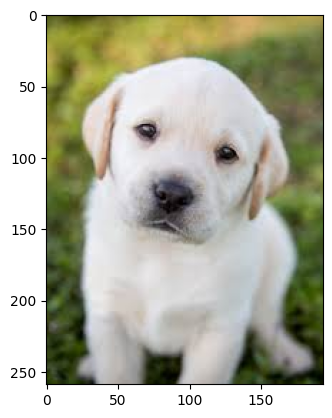

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/OpenCV/facebook.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
height, width, channels = img.shape
data_structure = img.shape
file_size = os.path.getsize('/content/drive/MyDrive/Colab Notebooks/OpenCV/facebook.jpg')
print(f"Cấu trúc dữ liệu ảnh: {data_structure}")
print(f"Dung lượng file ảnh: {file_size} bytes")
print(f"Độ phân giải: {width}x{height}, Số kênh màu: {channels}")

Cấu trúc dữ liệu ảnh: (259, 194, 3)
Dung lượng file ảnh: 6166 bytes
Độ phân giải: 194x259, Số kênh màu: 3


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/OpenCV/1.jpg')
output_path = '/content/drive/MyDrive/Colab Notebooks/OpenCV/dog_output.png'
cv2.imwrite(output_path, img)

True

In [ ]:
def basic_sobel_edge_detection(image_path, blur_ksize, sobel_ksize, skipping_threshold):
    img = cv2.imread(image_path)  # Đọc ảnh đầu vào
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Chuyển ảnh thành ảnh đa mức xám
    img_gaussian = cv2.GaussianBlur(img_gray, (blur_ksize, blur_ksize), 0)  # Lọc ảnh đa mức xám bằng bộ lọc Gauss với kích thước phụ thuộc vào blur_ksize

    # sobel
    img_sobelx = cv2.Sobel(img_gaussian, cv2.CV_8U, 1, 0, ksize=sobel_ksize)
    img_sobely = cv2.Sobel(img_gaussian, cv2.CV_8U, 0, 1, ksize=sobel_ksize)  # Thực hiện Sobel theo phương y, tương tự theo phương x

    img_sobel = (img_sobelx + img_sobely)/2  # Tổng hợp ảnh Sobel từ phương x và y

    # Cắt ngưỡng
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] < skipping_threshold:
                img_sobel[i][j] = 0
            else:
                img_sobel[i][j] = 255
    return img_sobel

In [ ]:
def sobel_edge_detection(image_path, blur_ksize, sobel_ksize, skipping_threshold):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(img_gray, (blur_ksize, blur_ksize), 0)

    # sobel
    img_sobelx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=sobel_ksize)
    abs_sobelx = np.absolute(img_sobelx)
    sobelx_64f = np.uint8(abs_sobelx)
    img_sobely = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=sobel_ksize)
    abs_sobely = np.absolute(img_sobely)
    sobely_64f = np.uint8(abs_sobely)

    img_sobel = (sobelx_64f + sobely_64f) / 2

    # Cắt ngưỡng
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] < skipping_threshold:
                img_sobel[i][j] = 0
            else:
                img_sobel[i][j] = 255
    return img_sobel

In [ ]:
def prewitt_edge_detection(image_path, blur_ksize, skipping_threshold):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(img_gray, (blur_ksize, blur_ksize), 0)

    # prewitt
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
    img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
    img_prewitt1 = (img_prewittx + img_prewitty) / 2

    kernelx2 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    kernely2 = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    img_prewittx2 = cv2.filter2D(img_gaussian, -1, kernelx2)
    img_prewitty2 = cv2.filter2D(img_gaussian, -1, kernely2)
    img_prewitt2 = (img_prewittx2 + img_prewitty2) / 2

    img_prewitt = (img_prewitt1 + img_prewitt2) / 2
    for i in range(img_prewitt.shape[0]):
        for j in range(img_prewitt.shape[1]):
            if img_prewitt[i][j] < skipping_threshold:
                img_prewitt[i][j] = 0
            else:
                img_prewitt[i][j] = 255
    return img_prewitt

In [ ]:
def canny_edge_detection(image_path, blur_ksize, threshold1, threshold2, skipping_threshold):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(img_gray, (blur_ksize, blur_ksize), 0)

    img_canny = cv2.Canny(img_gaussian, threshold1, threshold2) #Lọc Canny theo 2 ngưỡng threshold1 và threshold2
    for i in range(img_canny.shape[0]):
        for j in range(img_canny.shape[1]):
            if img_canny[i][j] < skipping_threshold:
                img_canny[i][j] = 0
    return img_canny

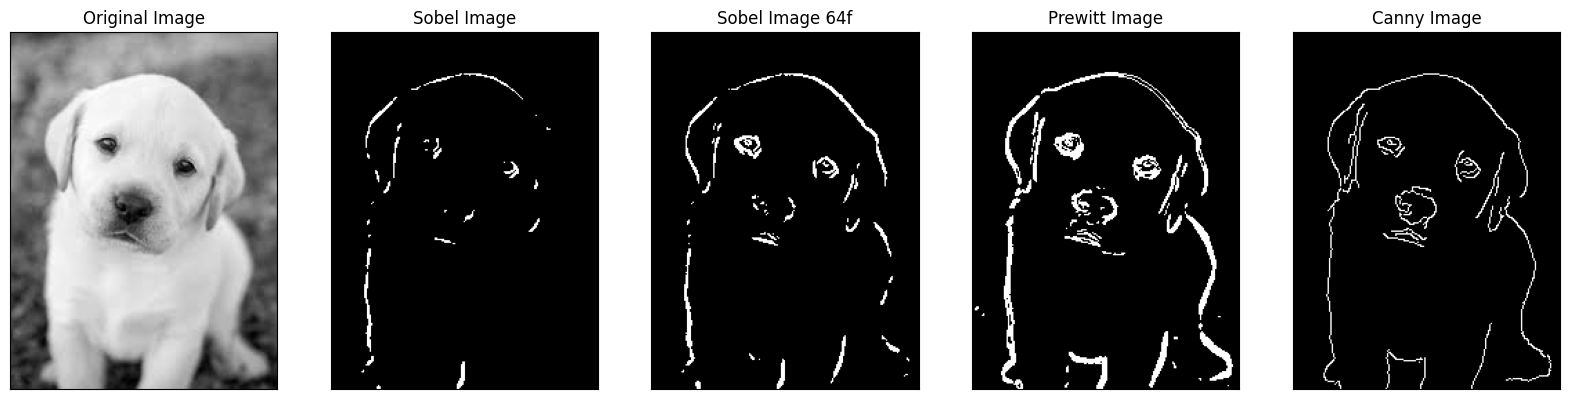

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/OpenCV/1.jpg'
gray = cv2.imread(image_path, 0)
img_sobel = basic_sobel_edge_detection(image_path, 3, 1, 30)
img_sobel64f = sobel_edge_detection(image_path, 3, 1, 30)
img_prewitt = prewitt_edge_detection(image_path, 3, 30)
img_canny = canny_edge_detection(image_path, 3, 100, 200, 30)

plt.figure(figsize=(20, 10))
plt.subplot(151),plt.imshow(gray, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel Image'), plt.xticks([]), plt.yticks([])
plt.subplot(153),plt.imshow(img_sobel64f,cmap = 'gray')
plt.title('Sobel Image 64f'), plt.xticks([]), plt.yticks([])
plt.subplot(154),plt.imshow(img_prewitt,cmap = 'gray')
plt.title('Prewitt Image'), plt.xticks([]), plt.yticks([])
plt.subplot(155),plt.imshow(img_canny,cmap = 'gray')
plt.title('Canny Image'), plt.xticks([]), plt.yticks([])
plt.show()